# Assignment 4

Niko Fauter (1047241)

Henning Klatt (1079429)

### Calculating discrete image gradient using the Sobel operator

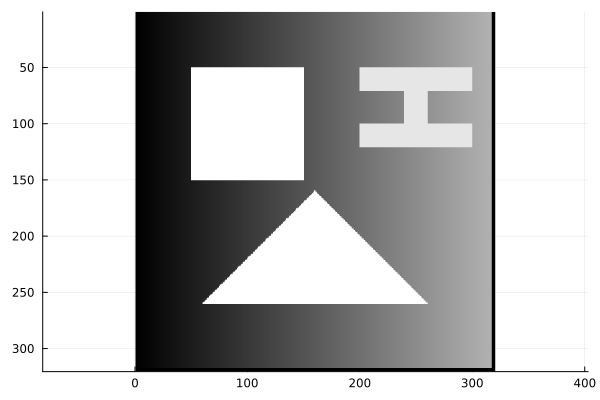

In [12]:
using Images, Plots, FileIO, ImageIO

function getDiscreteImageGradient(img)
    imgArray = channelview(float.(img))
    imgResult = zeros(Gray{Float64}, size(imgArray, 1), size(imgArray, 2));
    # https://en.wikipedia.org/wiki/Sobel_operator#Formulation
    kernel_x = [1 0 -1; 2 0 -2;1 0 -1]
    kernel_y = [1 2 1; 0 0 0;-1 -2 -1]
    for x in eachindex(1:size(imgArray,1) - size(kernel_x,1))
        for y in eachindex(1:size(imgArray,2) - size(kernel_y,2))
            # ToDo: apply kernel
            imgResult[x, y] = imgArray[x, y]
        end
    end
    return imgResult;
end

shapes=load("shapes1.png");
result = getDiscreteImageGradient(shapes);
plot(result)

### Calculating and plotting the magnitude